# Leader board

Check out the latest challenge results here!

:::{tip}

Be sure to refresh the page to get the latest results.
:::

## Top 10 teams

Check out the evolution of the leading teams's progress!

In [1]:
# Rules of the game
MAX_GATES = 150
MAX_PARAMS = 60

# Leaderboard config
NUM_LEADERS = 10

# Helper function to compute total submission score
def compute_score(entry):
    # Accuracy 
    score = entry.Accuracy

    # Gate penalty
    score += 5 * (MAX_GATES - entry.Gates) / MAX_GATES

    # Params penalty
    score += 5 * (MAX_PARAMS - entry.Parameters) / MAX_PARAMS
    return score

/opt/hostedtoolcache/Python/3.11.9/x64/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/hostedtoolcache/Python/3.11.9/x64/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/hostedtoolcache/Python/3.11.9/x64/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/hostedtoolcache/Python/3.11.9/x64/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/hostedtoolcache/Python/3.11.9/x64/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49296 (\N{HANGUL SYLLABLE BBI}) missing from font(s) DejaVu Sans.
  func(*

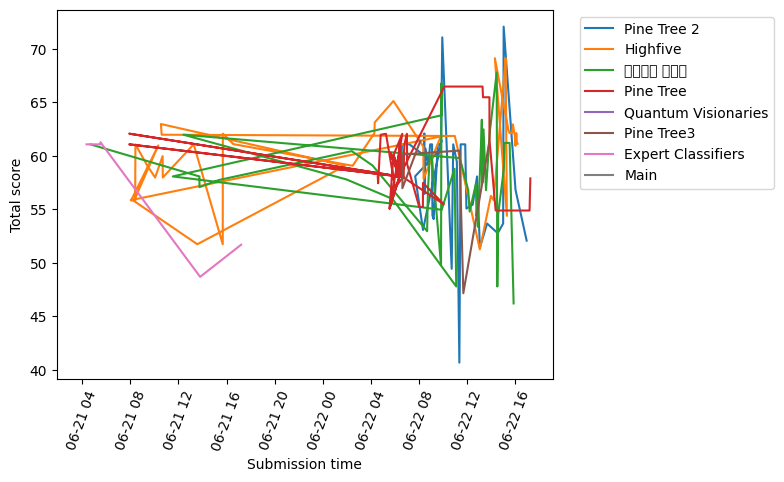

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Retrieve submissions and compute total score
results = pd.read_csv("results.csv", index_col=False)
results["Timestamp"] = pd.to_datetime(results.Timestamp, unit="s")
results.insert(1, "Score", results.apply(compute_score, axis=1))

# Get top teams, sorted by their highest scoring submission
gpby = results.groupby("Team")
top_teams = results.iloc[gpby.idxmax().Score].sort_values("Score", ascending=False)
leaders = top_teams[:NUM_LEADERS].reset_index(drop=True)

# Extract leading teams' data
agg = gpby.agg(list)
plt.xticks(rotation=70)
[plt.plot(agg.loc[team].Timestamp, agg.loc[team].Score) for team in leaders.Team]

# Make the plot pretty
plt.xlabel("Submission time")
plt.ylabel("Total score")
plt.legend(leaders.Team, bbox_to_anchor=(1.04, 1), loc="upper left");

In [3]:
leaders.rename(columns={"Score": "Top Score"})

,Team,Top Score,Commit,Timestamp,Accuracy,Gates,Parameters
0,Pine Tree 2,72.083333,f572d9,2024-06-22 15:02:42,64.0,10,19
1,Highfive,69.133333,18325c,2024-06-22 15:12:36,60.0,6,8
2,소나무가 삐지면,67.800000,4e2f86,2024-06-22 14:27:57,60.0,11,22
3,Pine Tree,66.483333,b090f2,2024-06-22 10:06:39,58.0,8,15
4,Quantum Visionaries,62.083333,00ce1d,2024-06-21 03:45:55,54.0,10,19
5,Pine Tree3,61.383333,5ccd8d,2024-06-22 08:06:30,53.0,11,15
6,Expert Classifiers,61.283333,9b7ce8,2024-06-21 05:30:36,53.0,14,15
7,Main,61.083333,6e8482,2024-06-21 12:34:36,53.0,10,19


## Submission history

Please find all the challenge submissions below. Most recent submissions are at the top!

In [4]:
from IPython.display import display

history = results.sort_values("Timestamp", ascending=False).reset_index(drop=True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    display(history)

,Team,Score,Commit,Timestamp,Accuracy,Gates,Parameters
0,Pine Tree,57.900000,7adcc5,2024-06-22 17:15:56,50.0,8,22
1,Pine Tree,54.900000,4e1f72,2024-06-22 17:11:52,47.0,8,22
2,Pine Tree 2,52.083333,fd209c,2024-06-22 16:57:27,44.0,10,19
3,Highfive,61.133333,9ef20f,2024-06-22 16:12:23,52.0,6,8
4,Highfive,61.133333,ec7c76,2024-06-22 16:09:09,52.0,6,8
5,Highfive,62.133333,139b20,2024-06-22 16:05:52,53.0,6,8
6,Pine Tree 2,56.833333,f2c938,2024-06-22 16:01:52,50.0,25,28
7,Highfive,60.950000,6a68a1,2024-06-22 16:01:30,52.0,9,9
8,Highfive,61.950000,34e361,2024-06-22 15:57:49,53.0,9,9
9,소나무가 삐지면,46.216667,6b3800,2024-06-22 15:52:22,37.0,6,7
